In [105]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

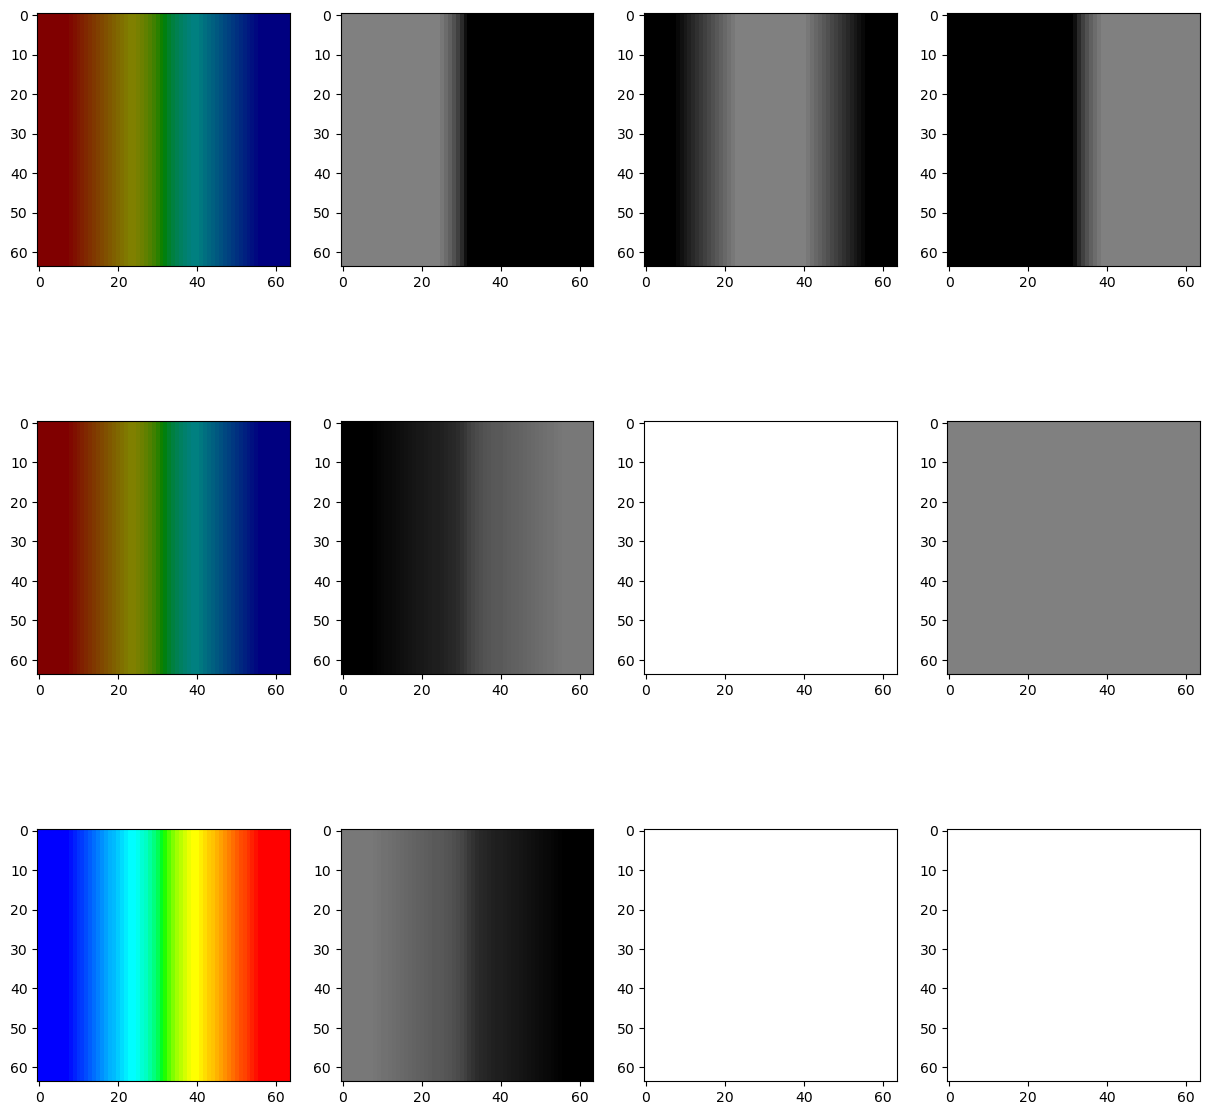

In [106]:
patron = cv.imread("imagenes/patron.tif")


patron = cv.cvtColor(patron,cv.COLOR_BGR2RGB)
RGB = cv.split(patron)

patronHSV = cv.cvtColor(patron, cv.COLOR_RGB2HSV)
HSV = cv.split(patronHSV)

HSV_2 = np.copy(HSV)
HSV_2[0] = cv.flip(HSV_2[0],1)
HSV_2[2] = 255*np.ones(HSV_2[2].shape)
patron_2 = cv.cvtColor(cv.merge(HSV_2), cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,15)) 
ax[0,0].imshow(patron)
ax[0,1].imshow(RGB[0],cmap="gray",vmin=0,vmax=255)
ax[0,2].imshow(RGB[1],cmap="gray",vmin=0,vmax=255)
ax[0,3].imshow(RGB[2],cmap="gray",vmin=0,vmax=255)

ax[1,0].imshow(patron)
ax[1,1].imshow(HSV[0],cmap="gray",vmin=0,vmax=255)
ax[1,2].imshow(HSV[1],cmap="gray",vmin=0,vmax=255)
ax[1,3].imshow(HSV[2],cmap="gray",vmin=0,vmax=255)

ax[2,0].imshow(patron_2)
ax[2,1].imshow(HSV_2[0],cmap="gray",vmin=0,vmax=255)
ax[2,2].imshow(HSV_2[1],cmap="gray",vmin=0,vmax=255)
ax[2,3].imshow(HSV_2[2],cmap="gray",vmin=0,vmax=255)

plt.show()

In [107]:
x=[1,2,3,4,5]
for i in x:
    x
x

[1, 2, 3, 4, 5]

In [108]:
def img_complemento(img):
    rosasHSV = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    HSV = cv.split(rosasHSV)
    for i in range(HSV[0].shape[0]):
        for j in range(HSV[0].shape[1]):
            if HSV[0][i,j]>90:
                HSV[0][i,j]-= 90
            else:
                HSV[0][i,j]+= 90
                
    img_clm = cv.cvtColor(cv.merge(HSV), cv.COLOR_HSV2BGR)
    return img_clm

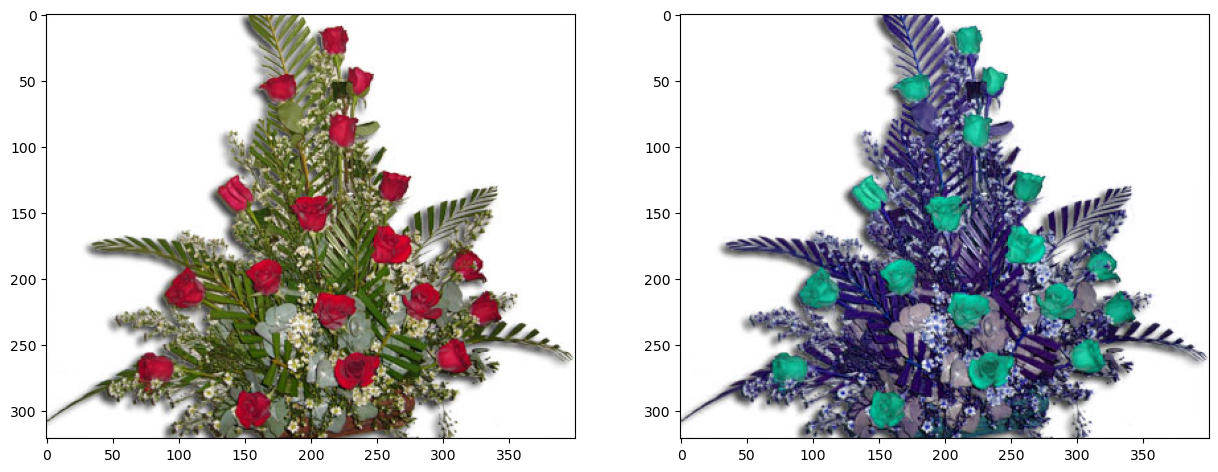

In [109]:
rosas = cv.imread("imagenes/rosas.jpg")

rosas_complemento = img_complemento(rosas)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15)) 
ax[0].imshow(rosas[:,:,[2,1,0]])
ax[1].imshow(rosas_complemento[:,:,[2,1,0]])

plt.show()

In [110]:
def perfilesRGB(img,fila):
    imgHSV = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    HSV = cv.split(imgHSV)


    img_line=img.copy()
    img_line[fila,:]=0

    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,15)) 
    ax[0,0].imshow(img_line[:,:,[2,1,0]])

    ax[0,1].plot(img[fila,:,2])
    ax[0,2].plot(img[fila,:,1])
    ax[0,3].plot(img[fila,:,0])

    ax[1,0].imshow(img_line[:,:,[2,1,0]])
    ax[1,1].plot(HSV[0][fila,:])
    ax[1,2].plot(HSV[1][fila,:])
    ax[1,3].plot(HSV[2][fila,:])

    plt.show()


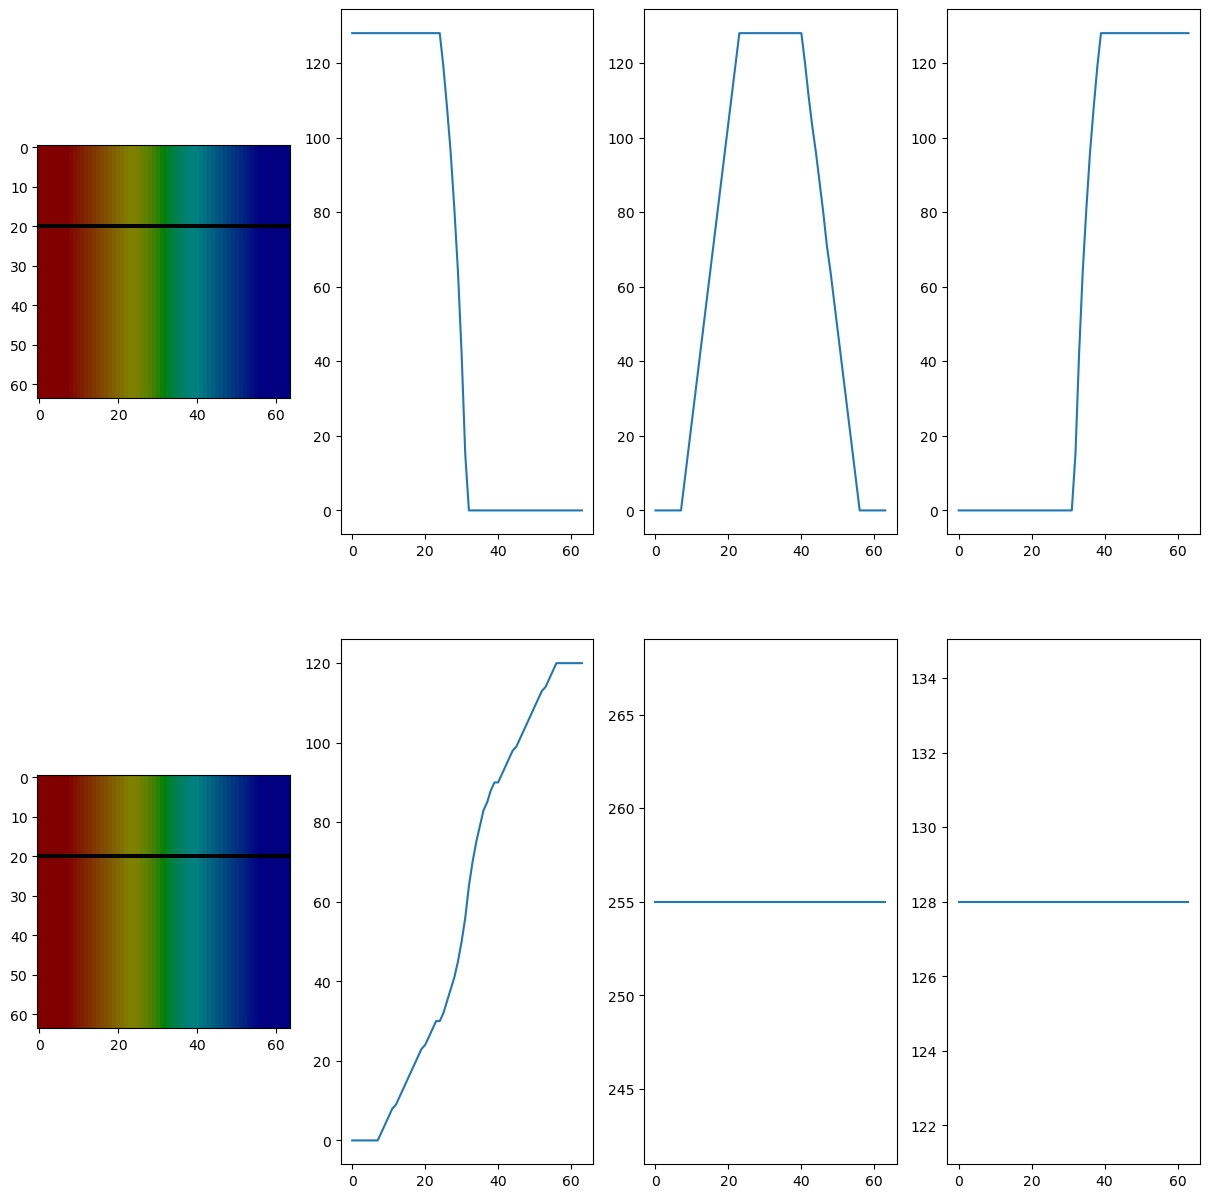

In [111]:
rosas = cv.imread("imagenes/rosas.jpg")

fila=int(rosas.shape[0]/2)
#perfilesRGB(rosas,fila)

patron = cv.imread("imagenes/patron.tif")
perfilesRGB(patron,20)

# EJERCICIO 2


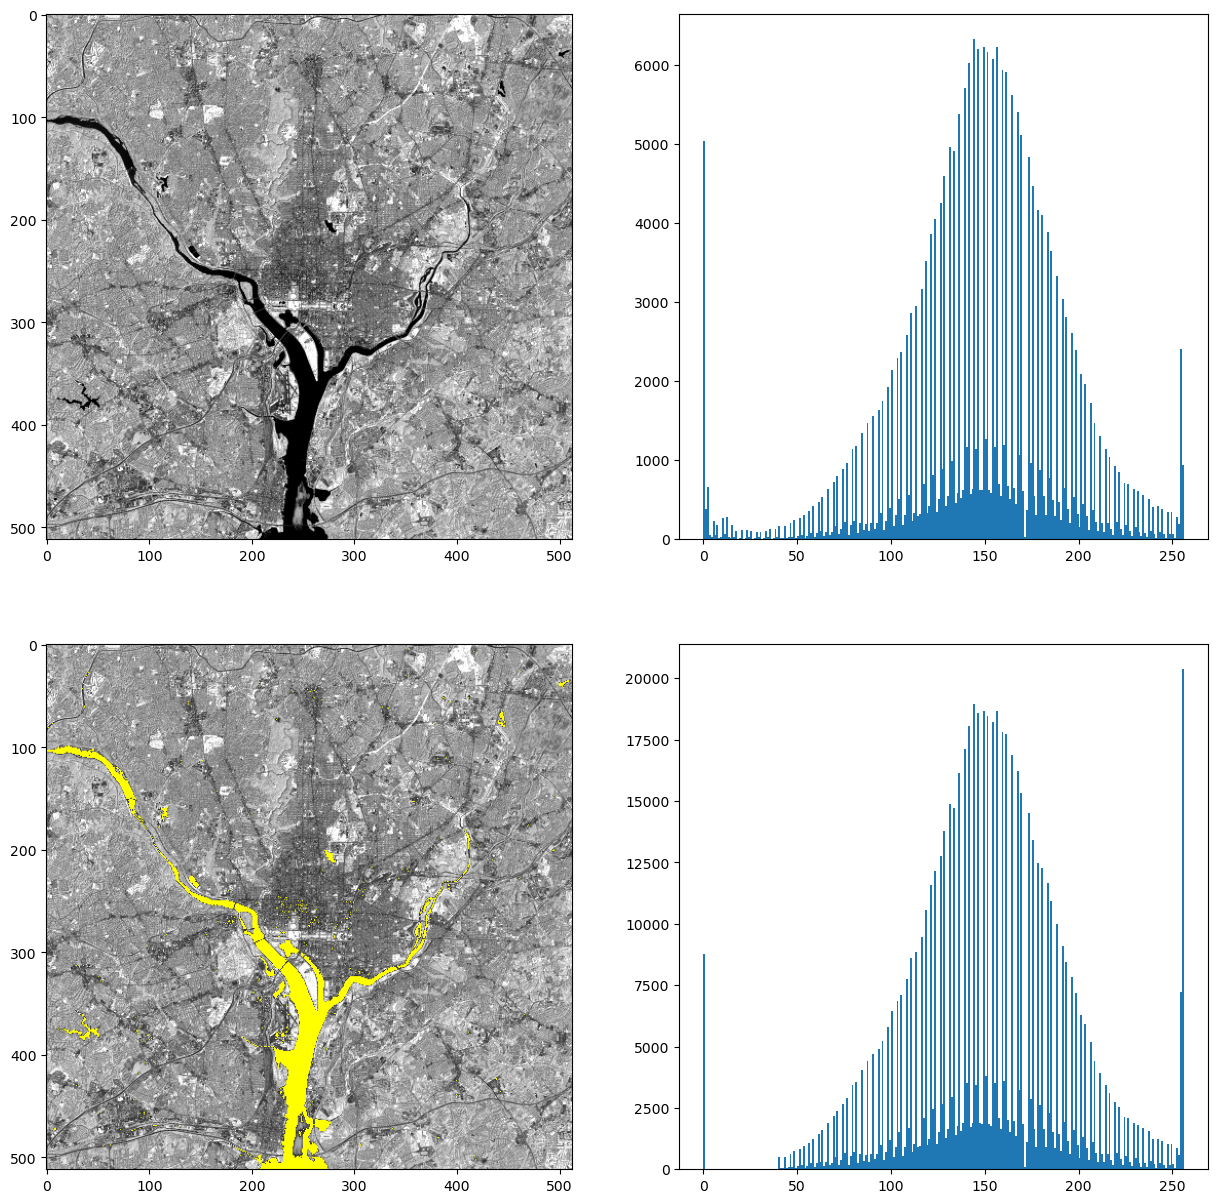

In [112]:
rio = cv.imread("imagenes/rio.jpg",cv.IMREAD_GRAYSCALE)
rio_hst = np.histogram(rio)

rango=40

RGB = np.array([rio,rio,rio])

for i in range(rio.shape[0]):
    for j in range(rio.shape[1]):
        if rio[i,j]<rango:
            RGB[0][i,j] = 255
            RGB[1][i,j] = 255
            RGB[2][i,j] = 0

rioRGB = cv.merge(RGB)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15)) 
ax[0,0].imshow(rio,cmap="gray",vmin=0,vmax=255)
ax[0,1].hist(rio.ravel(),256,[0,256])
ax[1,0].imshow(rioRGB)
ax[1,1].hist(rioRGB.ravel(),256,[0,256])
plt.show()


# ejercicio 3

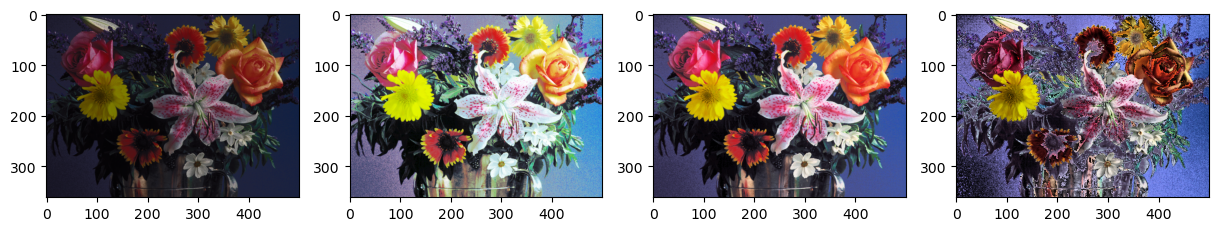

In [113]:
chairs = cv.imread('imagenes/flowers_oscura.tif')

RGB = np.array(cv.split(chairs))
RGB[0]=cv.equalizeHist(RGB[0])
RGB[1]=cv.equalizeHist(RGB[1])
RGB[2]=cv.equalizeHist(RGB[2])
imgEqulRGB = cv.merge(RGB)

HSV = np.array(cv.split(cv.cvtColor(chairs,cv.COLOR_BGR2HSV)))
HSI = np.copy(HSV)

HSV[2] = cv.equalizeHist(HSV[2])
imgEqulHSV = cv.cvtColor(cv.merge(HSV),cv.COLOR_HSV2BGR)

HSI[2] = (RGB[0]+RGB[1]+RGB[2])/3
HSI[2] = cv.equalizeHist(HSI[2])
imgEqulHSI = cv.cvtColor(cv.merge(HSI),cv.COLOR_HSV2BGR)


fig2, ax2  = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
ax2[0].imshow(chairs[:,:,[2,1,0]])
ax2[1].imshow(imgEqulRGB[:,:,[2,1,0]])
ax2[2].imshow(imgEqulHSV[:,:,[2,1,0]])
ax2[3].imshow(imgEqulHSI[:,:,[2,1,0]])
plt.show()

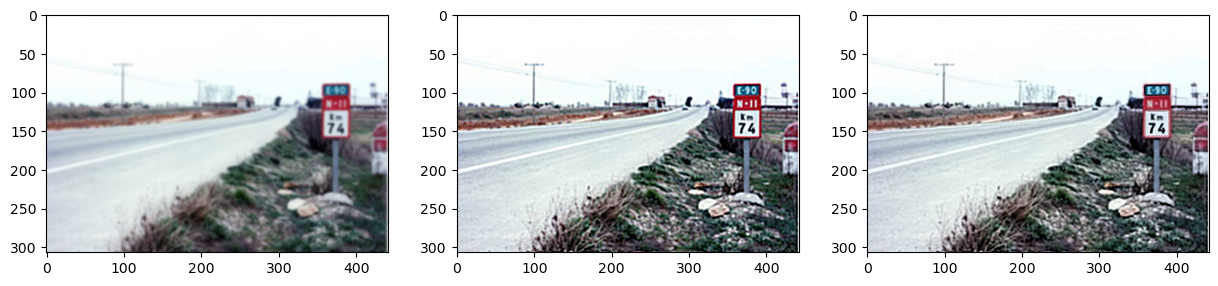

In [114]:
camino = cv.imread('imagenes/camino.tif')

kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

RGB = np.array(cv.split(camino))
RGB[0]=cv.filter2D(RGB[0],-1,kernel)
RGB[1]=cv.filter2D(RGB[1],-1,kernel)
RGB[2]=cv.filter2D(RGB[2],-1,kernel)
imgEqulRGB = cv.merge(RGB)

HSV = np.array(cv.split(cv.cvtColor(camino,cv.COLOR_BGR2HSV)))
HSV[2] = cv.filter2D(HSV[2],-1,kernel)
imgEqulHSV = cv.cvtColor(cv.merge(HSV),cv.COLOR_HSV2BGR)

fig2, ax2  = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
ax2[0].imshow(camino[:,:,[2,1,0]])
ax2[1].imshow(imgEqulRGB[:,:,[2,1,0]])
ax2[2].imshow(imgEqulHSV[:,:,[2,1,0]])
plt.show()

# ejercicio 4

In [311]:
from scipy.spatial import distance

def func_esfera(img,roi,R):
    BGR_roi = cv.split(roi)

    maxB=np.argmax(np.histogram(BGR_roi[0],np.arange(256))[0])
    maxG=np.argmax(np.histogram(BGR_roi[1],np.arange(256))[0])
    maxR=np.argmax(np.histogram(BGR_roi[2],np.arange(256))[0])
    H,W = img.shape[0:2]
    maskBGR = np.zeros((H,W),np.uint8)

    for i in range(H):
        for j in range(W):
            bgr_imagen = img[i][j]
            if distance.euclidean((maxB,maxG,maxR),(bgr_imagen[0],bgr_imagen[1],bgr_imagen[2])) <= R:
                maskBGR[i][j]=255
    return maskBGR

def func_cubo(img,roi,deltaHue,deltaSatu):
    
    HSV = cv.split(cv.cvtColor(roi, cv.COLOR_BGR2HSV))
    HSV_img = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))
    
    
    maxH=np.argmax(np.histogram(HSV[0],np.arange(256))[0])
    maxS=np.argmax(np.histogram(HSV[1],np.arange(256))[0])

    H,W = img.shape[0:2]
    maskHSV = np.zeros((H,W),np.uint8)

    for i in np.arange(H):
        for j in np.arange(W):
            pxH = HSV_img[0][i,j]
            pxS = HSV_img[1][i,j]
            if  pxH >=maxH-deltaHue and pxH <=maxH+deltaHue and pxS>=maxS-deltaSatu and pxS <=maxS+deltaSatu:
                maskHSV[i,j] = 255
    return maskHSV



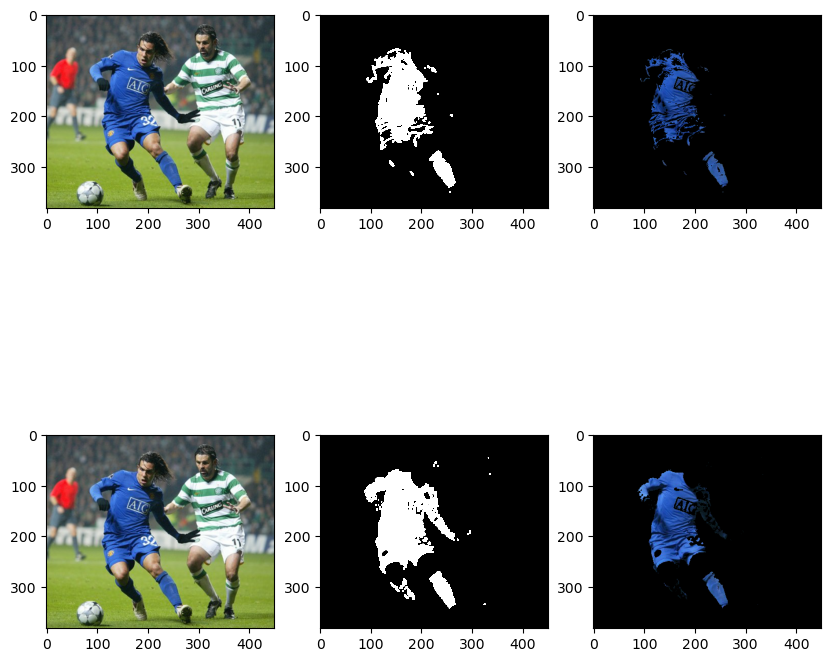

In [193]:
fulvo = cv.imread('imagenes/futbol.jpg')

#fulvo = cv.imread("imagenes/s01_i08_H_CM.png")
#fulvo = cv.imread("imagenes/s03_i10_H_DM.png")
#fulvo = cv.imread("imagenes/s05_i08_H_LB.png")
#fulvo = cv.imread("imagenes/s06_i13_H_LV.png")
#fulvo = cv.imread("imagenes/s08_i06_H_MA.png")

roi = fulvo[160:200,130:170]
maskBGR = func_esfera(fulvo,roi,87)
maskHSV = func_cubo(fulvo,roi,15,110)
RGB = cv.split(fulvo)

imagen = cv.bitwise_and(fulvo,fulvo,mask=maskBGR)
imagen2 = cv.bitwise_and(fulvo,fulvo,mask=maskHSV)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10)) 
ax[0,0].imshow(fulvo[:,:,[2,1,0]])
ax[0,1].imshow(maskBGR,cmap="gray",vmin=0,vmax=1) 
ax[0,2].imshow(imagen[:,:,[2,1,0]])
ax[1,0].imshow(fulvo[:,:,[2,1,0]])
ax[1,1].imshow(maskHSV,cmap="gray",vmin=0,vmax=1) 
ax[1,2].imshow(imagen2[:,:,[2,1,0]])
plt.show()

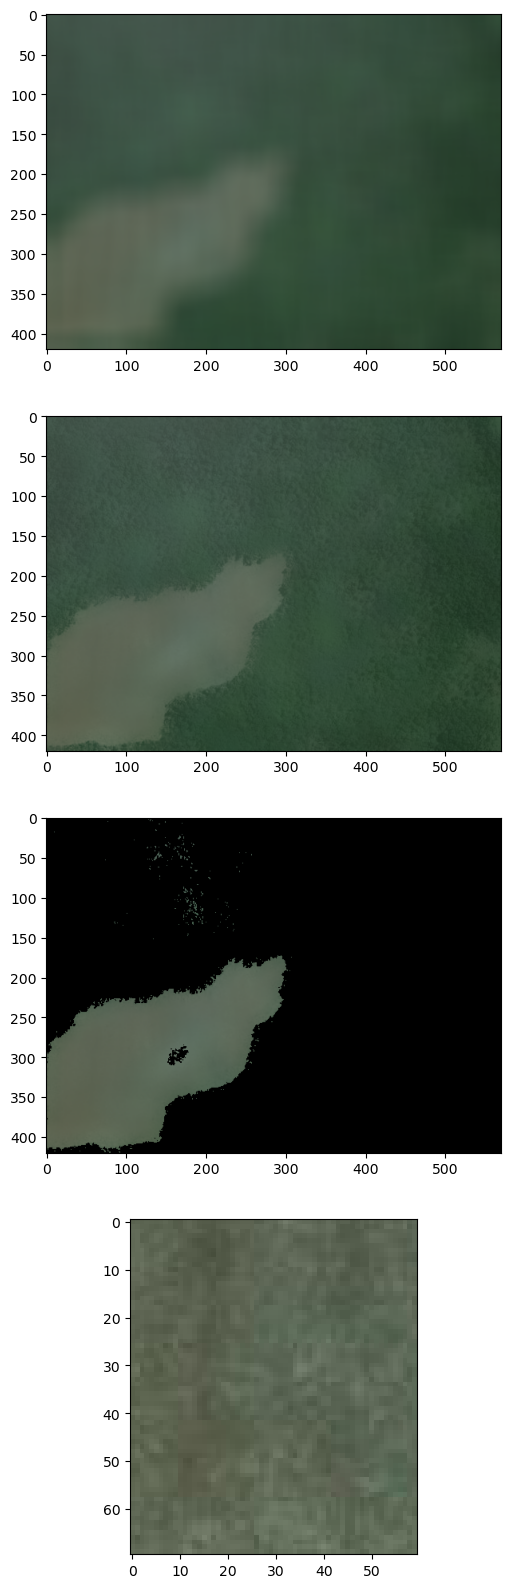

In [329]:
bosquent = cv.imread('imagenes\Deforestacion.png')
bosquecito = bosquent[280:700,160:730]
bosquecito_pb2 = cv.bilateralFilter(bosquecito,40,70,70)
bosquecito_pb= cv.boxFilter(bosquecito,-1,(40,40))
# bosquent = cv.boxFilter(bosquent,-1,(40,40))
roi = bosquecito[330:400,40:100]


# maskBGR2 = func_esfera(bosquent,roi,22)
maskBGR = func_esfera(bosquecito_pb2,roi,22)
maskHSV = func_cubo(bosquecito_pb,roi,7,10)

imagen = cv.bitwise_and(bosquecito_pb2,bosquecito_pb2,mask=maskBGR)
imagen2 = cv.bitwise_and(bosquecito_pb,bosquecito_pb,mask=maskHSV)
# imagen3 = cv.bitwise_and(bosquent,bosquent,mask=maskBGR2)

fig,ax = plt.subplots(4,1,figsize=(20,20))
ax[0].imshow(bosquecito_pb[:,:,[2,1,0]])
ax[1].imshow(bosquecito_pb2[:,:,[2,1,0]])
ax[2].imshow(imagen[:,:,[2,1,0]])
ax[3].imshow(roi[:,:,[2,1,0]])
plt.show()